In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y dataset')

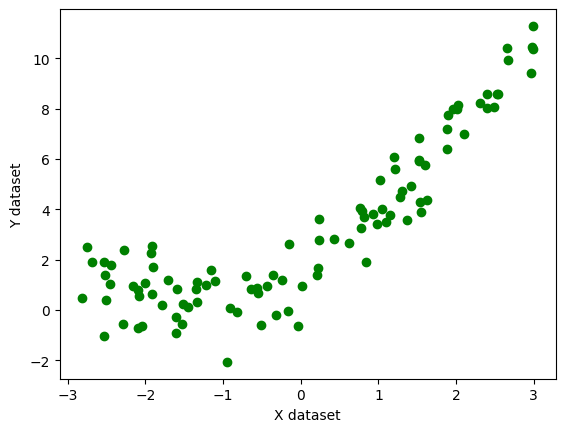

In [2]:
# df = pd.read_csv("")
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
X_train

array([[ 1.20258191],
       [-1.9111543 ],
       [ 2.52975816],
       [ 2.97436014],
       [ 2.30403348],
       [-0.14614458],
       [-2.27800229],
       [-0.82600498],
       [ 0.83669464],
       [-1.44999354],
       [ 0.78442676],
       [-0.56847637],
       [ 1.04097813],
       [ 2.53597883],
       [ 1.14747388],
       [-2.51571668],
       [-2.74686992],
       [-2.07937455],
       [ 1.59912624],
       [ 0.93140978],
       [ 1.54667524],
       [-0.90490746],
       [ 1.52031384],
       [-2.088696  ],
       [-0.35416127],
       [-1.32889027],
       [ 1.20901264],
       [ 2.09850077],
       [-2.00012841],
       [-1.60360575],
       [-1.5265724 ],
       [ 1.09400117],
       [ 0.76480145],
       [ 1.87722362],
       [ 0.20991913],
       [-1.58870292],
       [-0.43081209],
       [-2.5058677 ],
       [-1.52050845],
       [-2.43582029],
       [ 2.98683815],
       [-0.9484188 ],
       [ 1.89722413],
       [-2.69156421],
       [-1.10329897],
       [ 0

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [8]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
regression =LinearRegression()

In [11]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score



In [14]:
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Training Set Evaluation")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 



Training Set Evaluation
Mean Squared Error: 2.57441939352202
R^2 Score: 0.7544831211860874


In [15]:
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Test Set Evaluation")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Test Set Evaluation
Mean Squared Error: 3.0179536777713483
R^2 Score: 0.7031954496258728


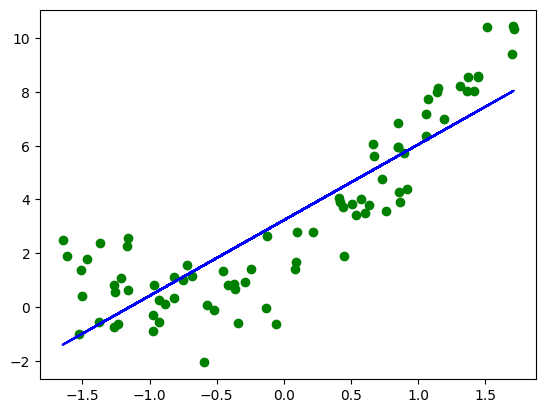

In [16]:
plt.scatter(X_train,y_train,color='g')
plt.plot(X_train,y_pred_train,color='b')

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [19]:
from sklearn.metrics import r2_score

In [20]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred_train = regression.predict(X_train_poly)
y_pred_test = regression.predict(X_test_poly)


In [21]:
train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)
print(train_score)
print(test_score)


0.9083063794731636
0.937568659907084


In [23]:
print(regression.coef_)
print(regression.intercept_)

[[0.         2.80601988 1.53563639]]
[1.69183886]


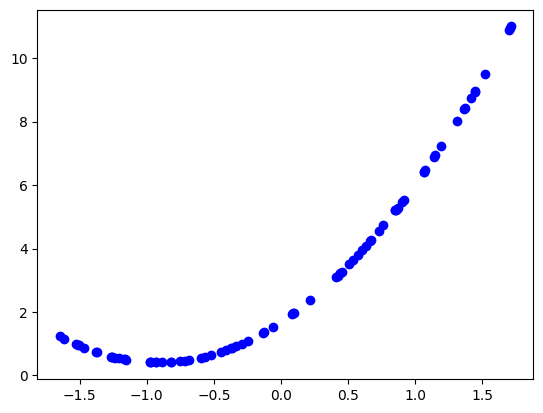

In [28]:
# plt.scatter(X_train,y_train,color='g')
plt.scatter(X_train,y_pred_train,color='b')

In [29]:
from sklearn.pipeline import Pipeline

In [32]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

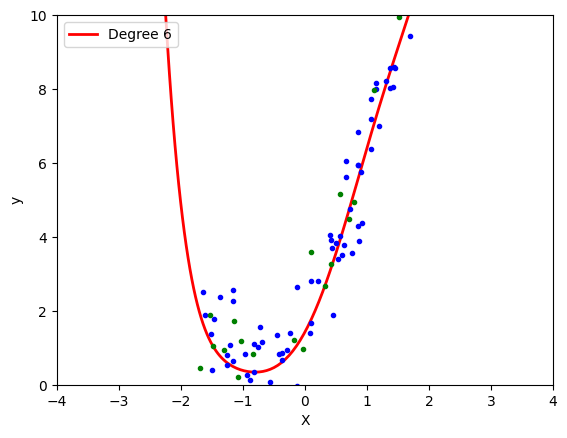

In [37]:
poly_regression(6)